In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [3]:
%matplotlib notebook

## Define unit cells

In [4]:
e_SQ = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/2]])
e_TR = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/3]])
Ratio_ca = 1.9
# ratio_ca = np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)
l_c = 1*np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)/Ratio_ca
l_a = 1

### Triangular unit cell 1 (TR1)

In [60]:
# TR1
R_c = (1+np.sqrt(3)/2)/np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
R_s = 0.5/np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
R_l = np.array([[R_c,-R_s],
              [R_s,R_c]])
v_C = R_l.T@np.array([7/15-11/60,2/15-11/60])*np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
v_D = R_l.T@np.array([11/15-11/60,1/15-11/60])*np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)

R_T = np.array([[np.cos(np.pi*2/3),-np.sin(np.pi*2/3)],
                [np.sin(np.pi*2/3),np.cos(np.pi*2/3)]])
f_O = np.array([0.5,np.sqrt(3)/6])
f_0 = np.array([0.5,v_D[0]-1])
f_1 = R_T@(f_0-f_O)+f_O
f_2 = R_T@(f_1-f_O)+f_O
# white sites
cTR_wht1 = []
for z in [1/4,3/4]:
    f_edge_w = np.array([[0,0],[0,1],[1,0]])
    c_xy = np.array([e_TR.T@f for f in f_edge_w])*l_a
    c_z = np.ones([len(f_edge_w),1])*l_c*z
    c = np.hstack((c_xy,c_z))
    cTR_wht1.append(c)
cTR_wht1 = np.array(cTR_wht1)
cTR_wht1 = cTR_wht1.reshape([2*len(f_edge_w),3])

# blue sites
cTR_blu1 = []
for z in [0,1]:
    f_edge_b = np.array([f_0,f_1,f_2])
    c_xy = np.array([f for f in f_edge_b])*l_a
    c_z = np.ones([len(f_edge_b),1])*l_c*z
    c = np.hstack((c_xy,c_z))
    cTR_blu1.append(c)
cTR_blu1 = np.array(cTR_blu1)
cTR_blu1 = cTR_blu1.reshape([2*len(f_edge_b),3])

# yellow sites
cTR_ylw1 = []
for z in [1/2]:
    f_edge_y = (np.array([[0,0.5]])+np.array([[0.5,0]])+np.array([[0.5,0.5]]))/3
    c_xy = np.array([e_TR.T@f for f in f_edge_y])*l_a
    c_z = np.ones([len(f_edge_y),1])*l_c*z
    c = np.hstack((c_xy,c_z))
    cTR_ylw1.append(c)
cTR_ylw1 = np.array(cTR_ylw1)
cTR_ylw1 = cTR_ylw1.reshape([1*len(f_edge_y),3])

# TR2
# white sites
cTR_wht2 = []
for z in [1/4,3/4]:
    f_edge_w = np.array([[0,0],[0,1],[1,0]])
    c_xy = np.array([e_TR.T@f for f in f_edge_w])*l_a
    c_z = np.ones([len(f_edge_w),1])*l_c*z
    c = np.hstack((c_xy,c_z))
    cTR_wht2.append(c)
cTR_wht2 = np.array(cTR_wht2)
cTR_wht2 = cTR_wht2.reshape([2*len(f_edge_w),3])

# blue sites
cTR_blu2 = []
for z in [0,1]:
    f_edge_b = (np.array([[0,0.5]])+np.array([[0.5,0]])+np.array([[0.5,0.5]]))/3
    c_xy = np.array([e_TR.T@f for f in f_edge_b])*l_a
    c_z = np.ones([len(f_edge_b),1])*l_c*z
    c = np.hstack((c_xy,c_z))
    cTR_blu2.append(c)
cTR_blu2 = np.array(cTR_blu2)
cTR_blu2 = cTR_blu2.reshape([2*len(f_edge_b),3])

# yellow sites
cTR_ylw2 = []
for z in [1/2]:
    f_edge_y = np.array([f_0,f_1,f_2])
    c_xy = np.array([f for f in f_edge_y])*l_a
    c_z = np.ones([len(f_edge_y),1])*l_c*z
    c = np.hstack((c_xy,c_z))
    cTR_ylw2.append(c)
cTR_ylw2 = np.array(cTR_ylw2)
cTR_ylw2 = cTR_ylw2.reshape([1*len(f_edge_y),3])

<IPython.core.display.Javascript object>


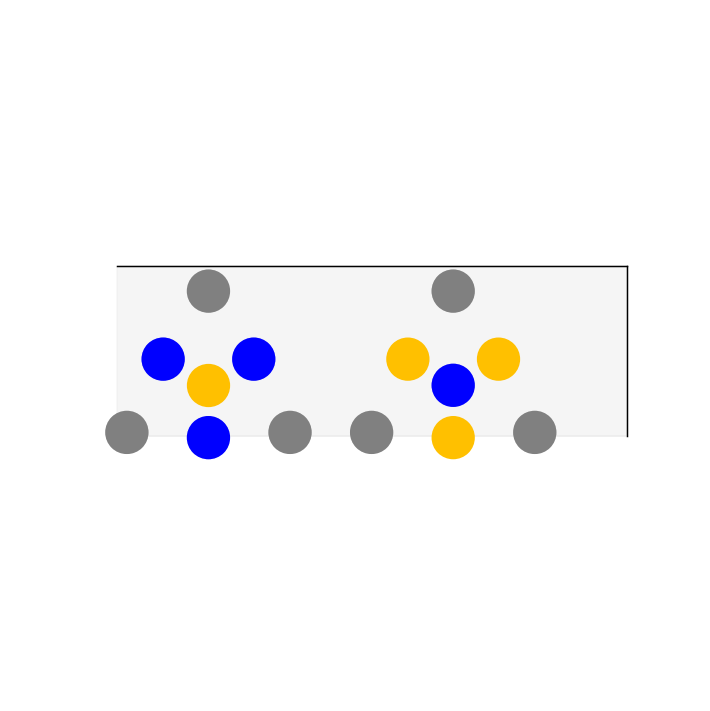

In [61]:
fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([3,1,1])
ax.view_init(elev=90, azim=-90)
ax.set_proj_type('ortho')
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(cTR_wht1[:,0],cTR_wht1[:,1],cTR_wht1[:,2],
           marker='o',c='#808080',s=500)
ax.scatter(cTR_blu1[:,0],cTR_blu1[:,1],cTR_blu1[:,2],
           marker='o',c='b',s=500)
ax.scatter(cTR_ylw1[:,0],cTR_ylw1[:,1],cTR_ylw1[:,2],
           marker='o',c='#FFC000',s=500)

ax.scatter(cTR_wht2[:,0]+1.5,cTR_wht2[:,1],cTR_wht2[:,2],
           marker='o',c='#808080',s=500)
ax.scatter(cTR_blu2[:,0]+1.5,cTR_blu2[:,1],cTR_blu2[:,2],
           marker='o',c='b',s=500)
ax.scatter(cTR_ylw2[:,0]+1.5,cTR_ylw2[:,1],cTR_ylw2[:,2],
           marker='o',c='#FFC000',s=500)


ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(0,3)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
plt.show()

### Square unit cell (SQ)

In [23]:
# place atoms
R_c = (1+np.sqrt(3)/2)/np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
R_s = 0.5/np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
R_l = np.array([[R_c,-R_s],
              [R_s,R_c]])
v_C = R_l.T@np.array([7/15-11/60,2/15-11/60])*np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
v_D = R_l.T@np.array([11/15-11/60,1/15-11/60])*np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
# white sites
cSQ_wht = []
for z in [1/4,3/4]:
    f_edge_w = np.array([[0,0],[0,1],[1,0],[1,1]])
    c_xy = np.array([e_SQ.T@f for f in f_edge_w])*l_a
    c_z = np.ones([len(f_edge_w),1])*l_c*z
    c = np.hstack((c_xy,c_z))
    cSQ_wht.append(c)
cSQ_wht = np.array(cSQ_wht)
cSQ_wht = cSQ_wht.reshape([2*len(f_edge_w),3])

# blue sites
cSQ_blu = []
for z in [0,1]:
    f_edge_b = np.array([[0.5,1-v_D[0]],[-v_C[1],0.5],[1+v_C[1],0.5],[0.5,v_D[0]]])
    c_xy = np.array([e_SQ.T@f for f in f_edge_b])*l_a
    c_z = np.ones([len(f_edge_b),1])*l_c*z
    c = np.hstack((c_xy,c_z))
    cSQ_blu.append(c)
cSQ_blu = np.array(cSQ_blu)
cSQ_blu = cSQ_blu.reshape([2*len(f_edge_b),3])

# yellow sites
cSQ_ylw = []
for z in [1/2]:
    f_edge_y = np.array([[1-v_D[0],0.5],[0.5,-v_C[1]],[0.5,1+v_C[1]],[v_D[0],0.5]])
    c_xy = np.array([e_SQ.T@f for f in f_edge_y])*l_a
    c_z = np.ones([len(f_edge_y),1])*l_c*z
    c = np.hstack((c_xy,c_z))
    cSQ_ylw.append(c)
cSQ_ylw = np.array(cSQ_ylw)
cSQ_ylw = cSQ_ylw.reshape([1*len(f_edge_y),3])

<IPython.core.display.Javascript object>


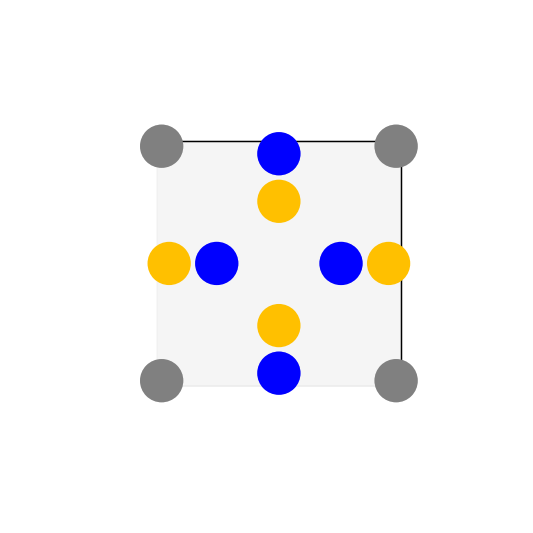

In [24]:
fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1,1,1])
ax.view_init(elev=90, azim=-90)
ax.set_proj_type('ortho')
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(cSQ_wht[:,0],cSQ_wht[:,1],cSQ_wht[:,2],
           marker='o',c='#808080',s=500)
ax.scatter(cSQ_blu[:,0],cSQ_blu[:,1],cSQ_blu[:,2],
           marker='o',c='b',s=500)
ax.scatter(cSQ_ylw[:,0],cSQ_ylw[:,1],cSQ_ylw[:,2],
           marker='o',c='#FFC000',s=500)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
plt.show()

## Create LAMMPS dump file

In [8]:
def Create_dump(c,filename,boundary=False):
    n_type = len(c)
    n_particles = np.sum([len(coord) for coord in c])
    
    if type(boundary)==bool:
        x_max = np.max([max(coord[:,0]) for coord in c])
        x_min = np.min([min(coord[:,0]) for coord in c])
        y_max = np.max([max(coord[:,1]) for coord in c])
        y_min = np.min([min(coord[:,1]) for coord in c])
        z_max = np.max([max(coord[:,2]) for coord in c])
        z_min = np.min([min(coord[:,2]) for coord in c])
    else:
        x_max = boundary[0,1]
        x_min = boundary[0,0]
        y_max = boundary[1,1]
        y_min = boundary[1,0]
        z_max = boundary[2,1]
        z_min = boundary[2,0]
    
    with open(filename, 'w') as f:
        p_id = 0
        f.write('ITEM: TIMESTEP\n')
        f.write('{:d}\n'.format(0))
        f.write('ITEM: NUMBER OF ATOMS\n')
        f.write('{:d}\n'.format(n_particles))
        f.write('ITEM: BOX BOUNDS f f f\n')
        f.write('{} {}\n'.format(x_min, x_max))
        f.write('{} {}\n'.format(y_min, y_max))
        f.write('{} {}\n'.format(z_min, z_max))
        f.write('ITEM: ATOMS id type xu yu zu \n')
        for i_type in range(n_type):
            for i_p, coord in enumerate(c[i_type]):
                p_id+=1
                f.write('{:d} {:d} {} {} {}\n'.format(p_id, i_type, coord[0], coord[1], coord[2],))

In [64]:
# Triangular unitcell
cTR1 = [cTR_wht1,cTR_blu1,cTR_ylw1]
filename_cTR1 = './cTR1.dump'
Create_dump(cTR1,filename_cTR1)

cTR2 = [cTR_wht2,cTR_blu2,cTR_ylw2]
filename_cTR2 = './cTR2.dump'
Create_dump(cTR2,filename_cTR2)

# Square unitcell
cSQ = [cSQ_wht,cSQ_blu,cSQ_ylw]
filename_cSQ = './cSQ.dump'
Create_dump(cSQ,filename_cSQ)

## Define functions generating unitcell trajectories

In [62]:
def unitcell_TR1(origin, orientation, ratio_ca=np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)):
    '''
    Generate triangular unit cell
    origin: origin of unitcell, 3*1 array
    orientation: orientation of unitcell, 
                 represented by polar angle of the edge, float
    
    returns: cTR1 = [cTR1_wht,cTR1_blu,cTR1_ylw], lists of coordinates of the 3 types of particles
    '''
    e_SQ = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/2]])
    e_TR = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/3]])
    l_c = 1*np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)/ratio_ca
    l_a = 1
        
    R = np.array([[np.cos(orientation),-np.sin(orientation),0],
                  [np.sin(orientation), np.cos(orientation),0],
                  [0,0,1]])

    # TR1
    R_c = (1+np.sqrt(3)/2)/np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
    R_s = 0.5/np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
    R_l = np.array([[R_c,-R_s],
                  [R_s,R_c]])
    v_C = R_l.T@np.array([7/15-11/60,2/15-11/60])*np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
    v_D = R_l.T@np.array([11/15-11/60,1/15-11/60])*np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)

    R_T = np.array([[np.cos(np.pi*2/3),-np.sin(np.pi*2/3)],
                    [np.sin(np.pi*2/3),np.cos(np.pi*2/3)]])
    f_O = np.array([0.5,np.sqrt(3)/6])
    f_0 = np.array([0.5,v_D[0]-1])
    f_1 = R_T@(f_0-f_O)+f_O
    f_2 = R_T@(f_1-f_O)+f_O
    # white sites
    cTR_wht1 = []
    for z in [1/4,3/4]:
        f_edge_w = np.array([[0,0],[0,1],[1,0]])
        c_xy = np.array([e_TR.T@f for f in f_edge_w])*l_a
        c_z = np.ones([len(f_edge_w),1])*l_c*z
        c = np.hstack((c_xy,c_z))
        cTR_wht1.append(c)
    cTR_wht1 = np.array(cTR_wht1)
    cTR_wht1 = cTR_wht1.reshape([2*len(f_edge_w),3])

    # blue sites
    cTR_blu1 = []
    for z in [0,1]:
        f_edge_b = np.array([f_0,f_1,f_2])
        c_xy = np.array([f for f in f_edge_b])*l_a
        c_z = np.ones([len(f_edge_b),1])*l_c*z
        c = np.hstack((c_xy,c_z))
        cTR_blu1.append(c)
    cTR_blu1 = np.array(cTR_blu1)
    cTR_blu1 = cTR_blu1.reshape([2*len(f_edge_b),3])

    # yellow sites
    cTR_ylw1 = []
    for z in [1/2]:
        f_edge_y = (np.array([[0,0.5]])+np.array([[0.5,0]])+np.array([[0.5,0.5]]))/3
        c_xy = np.array([e_TR.T@f for f in f_edge_y])*l_a
        c_z = np.ones([len(f_edge_y),1])*l_c*z
        c = np.hstack((c_xy,c_z))
        cTR_ylw1.append(c)
    cTR_ylw1 = np.array(cTR_ylw1)
    cTR_ylw1 = cTR_ylw1.reshape([1*len(f_edge_y),3])
    
    cTR_wht1 = np.array([R@c for c in cTR_wht1])+origin
    cTR_blu1 = np.array([R@c for c in cTR_blu1])+origin
    cTR_ylw1 = np.array([R@c for c in cTR_ylw1])+origin 
    
    cTR1 = [cTR_wht1,cTR_blu1,cTR_ylw1]
    
    return cTR1

def unitcell_TR2(origin, orientation,ratio_ca=np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)):
    '''
    Generate triangular unit cell
    origin: origin of unitcell, 3*1 array
    orientation: orientation of unitcell, 
                 represented by polar angle of the edge, float
    
    returns: cTR1 = [cTR1_wht,cTR1_blu,cTR1_ylw], lists of coordinates of the 3 types of particles
    '''
    e_SQ = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/2]])
    e_TR = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/3]])
    l_c = 1*np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)/ratio_ca
    l_a = 1
        
    R = np.array([[np.cos(orientation),-np.sin(orientation),0],
                  [np.sin(orientation), np.cos(orientation),0],
                  [0,0,1]])

    # TR2
    R_c = (1+np.sqrt(3)/2)/np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
    R_s = 0.5/np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
    R_l = np.array([[R_c,-R_s],
                  [R_s,R_c]])
    v_C = R_l.T@np.array([7/15-11/60,2/15-11/60])*np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
    v_D = R_l.T@np.array([11/15-11/60,1/15-11/60])*np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)

    R_T = np.array([[np.cos(np.pi*2/3),-np.sin(np.pi*2/3)],
                    [np.sin(np.pi*2/3),np.cos(np.pi*2/3)]])
    f_O = np.array([0.5,np.sqrt(3)/6])
    f_0 = np.array([0.5,v_D[0]-1])
    f_1 = R_T@(f_0-f_O)+f_O
    f_2 = R_T@(f_1-f_O)+f_O
    # white sites
    cTR_wht2 = []
    for z in [1/4,3/4]:
        f_edge_w = np.array([[0,0],[0,1],[1,0]])
        c_xy = np.array([e_TR.T@f for f in f_edge_w])*l_a
        c_z = np.ones([len(f_edge_w),1])*l_c*z
        c = np.hstack((c_xy,c_z))
        cTR_wht2.append(c)
    cTR_wht2 = np.array(cTR_wht2)
    cTR_wht2 = cTR_wht2.reshape([2*len(f_edge_w),3])

    # blue sites
    cTR_blu2 = []
    for z in [0,1]:
        f_edge_b = (np.array([[0,0.5]])+np.array([[0.5,0]])+np.array([[0.5,0.5]]))/3
        c_xy = np.array([e_TR.T@f for f in f_edge_b])*l_a
        c_z = np.ones([len(f_edge_b),1])*l_c*z
        c = np.hstack((c_xy,c_z))
        cTR_blu2.append(c)
    cTR_blu2 = np.array(cTR_blu2)
    cTR_blu2 = cTR_blu2.reshape([2*len(f_edge_b),3])

    # yellow sites
    cTR_ylw2 = []
    for z in [1/2]:
        f_edge_y = np.array([f_0,f_1,f_2])
        c_xy = np.array([f for f in f_edge_y])*l_a
        c_z = np.ones([len(f_edge_y),1])*l_c*z
        c = np.hstack((c_xy,c_z))
        cTR_ylw2.append(c)
    cTR_ylw2 = np.array(cTR_ylw2)
    cTR_ylw2 = cTR_ylw2.reshape([1*len(f_edge_y),3])

    cTR_wht2 = np.array([R@c for c in cTR_wht2])+origin
    cTR_blu2 = np.array([R@c for c in cTR_blu2])+origin
    cTR_ylw2 = np.array([R@c for c in cTR_ylw2])+origin

    cTR2 = [cTR_wht2,cTR_blu2,cTR_ylw2]
    
    return cTR2

def unitcell_SQ(origin, orientation, ratio_ca=np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)):
    '''
    Generate rhombus unit cell
    origin: origin of unitcell, 3*1 array
    orientation: orientation of unitcell, 
                 represented by polar angle of the long diagonl, float
    
    returns: cH = [cH_wht,cH_blu,cH_ylw], lists of coordinates of the 3 types of particles
    '''
    e_SQ = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/2]])
    e_TR = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/3]])
    l_c = 1*np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)/ratio_ca
    l_a = 1
        
    R = np.array([[np.cos(orientation),-np.sin(orientation),0],
                  [np.sin(orientation), np.cos(orientation),0],
                  [0,0,1]])

    # place atoms
    R_c = (1+np.sqrt(3)/2)/np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
    R_s = 0.5/np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
    R_l = np.array([[R_c,-R_s],
                  [R_s,R_c]])
    v_C = R_l.T@np.array([7/15-11/60,2/15-11/60])*np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
    v_D = R_l.T@np.array([11/15-11/60,1/15-11/60])*np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
    # white sites
    cSQ_wht = []
    for z in [1/4,3/4]:
        f_edge_w = np.array([[0,0],[0,1],[1,0],[1,1]])
        c_xy = np.array([e_SQ.T@f for f in f_edge_w])*l_a
        c_z = np.ones([len(f_edge_w),1])*l_c*z
        c = np.hstack((c_xy,c_z))
        cSQ_wht.append(c)
    cSQ_wht = np.array(cSQ_wht)
    cSQ_wht = cSQ_wht.reshape([2*len(f_edge_w),3])

    # blue sites
    cSQ_blu = []
    for z in [0,1]:
        f_edge_b = np.array([[0.5,1-v_D[0]],[-v_C[1],0.5],[1+v_C[1],0.5],[0.5,v_D[0]]])
        c_xy = np.array([e_SQ.T@f for f in f_edge_b])*l_a
        c_z = np.ones([len(f_edge_b),1])*l_c*z
        c = np.hstack((c_xy,c_z))
        cSQ_blu.append(c)
    cSQ_blu = np.array(cSQ_blu)
    cSQ_blu = cSQ_blu.reshape([2*len(f_edge_b),3])

    # yellow sites
    cSQ_ylw = []
    for z in [1/2]:
        f_edge_y = np.array([[1-v_D[0],0.5],[0.5,-v_C[1]],[0.5,1+v_C[1]],[v_D[0],0.5]])
        c_xy = np.array([e_SQ.T@f for f in f_edge_y])*l_a
        c_z = np.ones([len(f_edge_y),1])*l_c*z
        c = np.hstack((c_xy,c_z))
        cSQ_ylw.append(c)
    cSQ_ylw = np.array(cSQ_ylw)
    cSQ_ylw = cSQ_ylw.reshape([1*len(f_edge_y),3])
    
    cSQ_wht = np.array([R@c for c in cSQ_wht])+origin
    cSQ_blu = np.array([R@c for c in cSQ_blu])+origin
    cSQ_ylw = np.array([R@c for c in cSQ_ylw])+origin
    
    cSQ = [cSQ_wht,cSQ_blu,cSQ_ylw]
    
    return cSQ

<IPython.core.display.Javascript object>


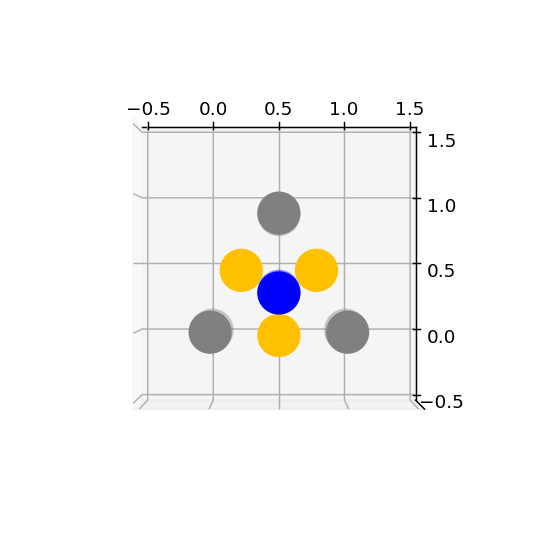

In [65]:
c_wht, c_blu, c_ylw = unitcell_TR2([0,0,0], 0)

fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([2,2,1])
ax.view_init(elev=90, azim=-90)
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(c_wht[:,0],c_wht[:,1],c_wht[:,2],
           marker='o',c='#808080',s=500)
ax.scatter(c_blu[:,0],c_blu[:,1],c_blu[:,2],
           marker='o',c='b',s=500)
ax.scatter(c_ylw[:,0],c_ylw[:,1],c_ylw[:,2],
           marker='o',c='#FFC000',s=500)

# ax.set_xticks([])
# ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)
ax.set_zlim(0,1)
plt.show()

<IPython.core.display.Javascript object>


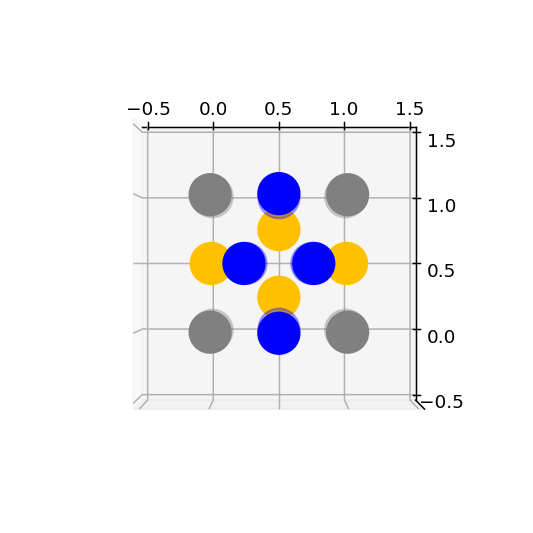

In [66]:
c_wht, c_blu, c_ylw = unitcell_SQ([0,0,0], 0)

fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([2,2,1])
ax.view_init(elev=90, azim=-90)
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(c_wht[:,0],c_wht[:,1],c_wht[:,2],
           marker='o',c='#808080',s=500)
ax.scatter(c_blu[:,0],c_blu[:,1],c_blu[:,2],
           marker='o',c='b',s=500)
ax.scatter(c_ylw[:,0],c_ylw[:,1],c_ylw[:,2],
           marker='o',c='#FFC000',s=500)

# ax.set_xticks([])
# ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)
ax.set_zlim(0,1)

plt.show()

## Generate FK sigma phase

In [67]:
def uniq_coords(coordinates,scale=50):
    id_coords = (np.round(coordinates*scale))
    id_coords_unique = (np.unique(id_coords,axis=0,return_index=True)[1])
    id_coords_unique.sort()
    coordinates_unique = coordinates[id_coords_unique,:]
    return coordinates_unique

def merge_coords(function,iterables):
    # Generate coordinates with the generating function according to the iterables 
    c_m_wht, c_m_blu, c_m_ylw = [np.vstack([function(i)[clr] for i in iterables]) for clr in range(3)]
    c_m_wht = uniq_coords(c_m_wht)
    c_m_blu = uniq_coords(c_m_blu)
    c_m_ylw = uniq_coords(c_m_ylw)
    return c_m_wht, c_m_blu, c_m_ylw

def stack_coords(coords):
    c_s_wht, c_s_blu, c_s_ylw = [np.vstack([c[clr] for c in coords]) for clr in range(3)]
    c_s_wht = uniq_coords(c_s_wht)
    c_s_blu = uniq_coords(c_s_blu)
    c_s_ylw = uniq_coords(c_s_ylw)
    return c_s_wht, c_s_blu, c_s_ylw

def shift_coords(coords,shift=np.array([0,0,0])):
    c_s_wht, c_s_blu, c_s_ylw = [coords[clr]+shift for clr in range(3)]
    return c_s_wht, c_s_blu, c_s_ylw

In [68]:
def c_FK_unit(origin,PBC=False):
    c_SQ1 = unitcell_SQ([0,0,0],0.0,ratio_ca=Ratio_ca)
    c_SQ2 = unitcell_SQ([0,0,0]+np.array([1+np.sqrt(3)/2,0.5,0]),np.pi/3,ratio_ca=Ratio_ca)
    c_TR1_1 = unitcell_TR1([0,0,0]+np.array([1,1,0]),2/3*np.pi,ratio_ca=Ratio_ca)
    c_TR1_2 = unitcell_TR1([0,0,0]+np.array([1,1,0]),1/3*np.pi,ratio_ca=Ratio_ca)
    c_TR2_1 = unitcell_TR2([0,0,0]+np.array([1,1,0]),-np.pi/2,ratio_ca=Ratio_ca)
    c_TR2_2 = unitcell_TR2([0,0,0]+np.array([1,0,0]),-np.pi/6,ratio_ca=Ratio_ca)
    
    c_wht, c_blu, c_ylw = stack_coords([c_SQ1,c_SQ2,c_TR1_1,c_TR1_2,c_TR2_1,c_TR2_2])
    
    R_c = (1+np.sqrt(3)/2)/np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
    R_s = 0.5/np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)
    R = np.array([[R_c,-R_s,0],
                  [R_s,R_c,0],
                  [0,0,1]])
    c_wht = np.array([R@c for c in c_wht])
    c_blu = np.array([R@c for c in c_blu])
    c_ylw = np.array([R@c for c in c_ylw])
    
    if PBC:
        sigma = 1e-6
        i_c_wht = (c_wht[:,0]>sigma) & (c_wht[:,1]<np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)-sigma)
        c_wht = c_wht[i_c_wht]
        i_c_blu = (c_blu[:,0]>sigma) & (c_blu[:,1]<np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)-sigma) & (c_blu[:,2]>sigma)
        c_blu = c_blu[i_c_blu]
        i_c_ylw = (c_ylw[:,0]>sigma) & (c_ylw[:,1]<np.sqrt((1+np.sqrt(3)/2)**2+(0.5)**2)-sigma)
        c_ylw = c_ylw[i_c_ylw]
        
    c_wht = c_wht + origin
    c_blu = c_blu + origin
    c_ylw = c_ylw + origin
    
    return c_wht, c_blu, c_ylw

def c_FK(nx,ny):
    shift_x = np.array([np.sqrt((1+np.sqrt(3)/2)**2+0.5**2),0,0])
    shift_y = np.array([0,np.sqrt((1+np.sqrt(3)/2)**2+0.5**2),0])
    c_unit_cells = []
    for i in range(nx):
        for j in range(ny):
            origin_ij = shift_x*i+shift_y*j
            c_unit_cells.append(c_FK_unit(origin_ij,PBC=True))
    c_wht, c_blu, c_ylw = stack_coords(c_unit_cells)
    
    return c_wht, c_blu, c_ylw

<IPython.core.display.Javascript object>


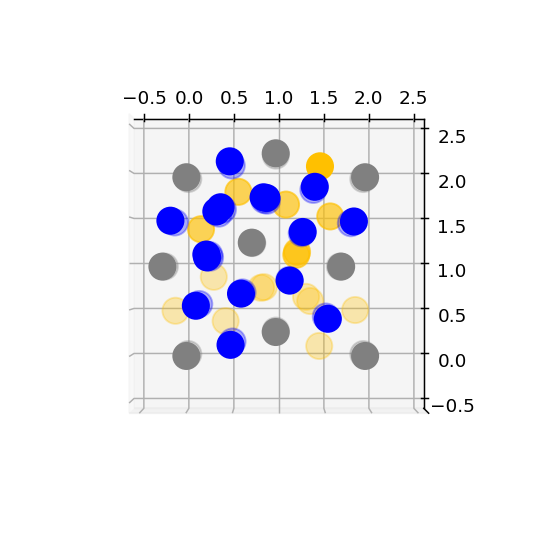

In [69]:
c_FKU_wht, c_FKU_blu, c_FKU_ylw = c_FK_unit([0,0,0],PBC=False)

fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([4,4,1])
ax.view_init(elev=90, azim=-90)
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(c_FKU_wht[:,0],c_FKU_wht[:,1],c_FKU_wht[:,2],
           marker='o',c='#808080',s=200)
ax.scatter(c_FKU_blu[:,0],c_FKU_blu[:,1],c_FKU_blu[:,2],
           marker='o',c='b',s=200)
ax.scatter(c_FKU_ylw[:,0],c_FKU_ylw[:,1],c_FKU_ylw[:,2],
           marker='o',c='#FFC000',s=200)

# ax.set_xticks([])
# ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-1,3)
ax.set_ylim(-1,3)
ax.set_zlim(0,1)

plt.show()

<IPython.core.display.Javascript object>


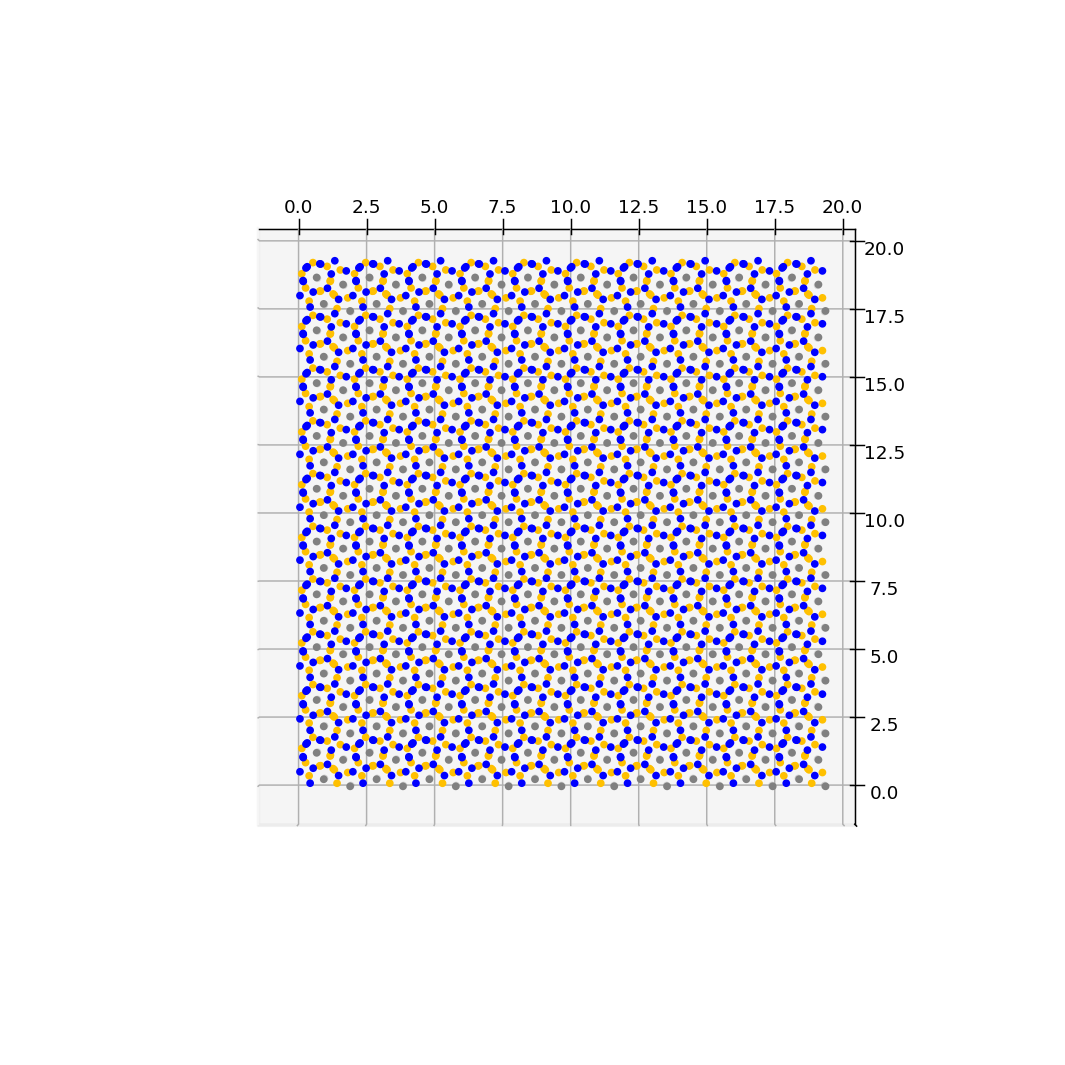

In [70]:
c_wht, c_blu, c_ylw = c_FK(10,10)

fig = plt.figure(figsize=(6,6))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([21,21,1])
ax.view_init(elev=90, azim=-90)
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(c_wht[:,0],c_wht[:,1],c_wht[:,2],
           marker='o',c='#808080',s=10)
ax.scatter(c_blu[:,0],c_blu[:,1],c_blu[:,2],
           marker='o',c='b',s=10)
ax.scatter(c_ylw[:,0],c_ylw[:,1],c_ylw[:,2],
           marker='o',c='#FFC000',s=10)

# ax.set_xticks([])
# ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-1,20)
ax.set_ylim(-1,20)
ax.set_zlim(0,1)

plt.show()

In [17]:
min(c_blu[:,0])

0.11207193402100674

In [18]:
n_x = 20
n_y = 20
n_layers = 40

c_layer_FK = c_FK(n_x,n_y)
c_rod = stack_coords([shift_coords(c_layer_FK, np.array([0,0,l_c])*s) for s in range(n_layers)])
l = np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)
bounds = np.array([[0,n_x*l],[0,n_y*l],[0,n_layers]])
filename_c_FK = './trajectory/c_FK/dump.000000000.txt'
filename_c_FK_dump = './trajectory/c_FK/c_FK.dump'
Create_dump(c_rod,filename_c_FK,boundary=bounds)
Create_dump(c_rod,filename_c_FK_dump,boundary=bounds)
Create_dump(c_rod,'c_FK.dump',boundary=bounds)

In [19]:
# randomly fluctuate atoms
c_rod = stack_coords([shift_coords(c_layer_FK, np.array([0,0,l_c])*s) for s in range(n_layers)])
d_fluc=0.25
c_rod_fluc = [c_rod[clr]+np.random.normal(0.0,d_fluc,size=[c_rod[clr].shape[0],c_rod[clr].shape[1]])*d_fluc 
              for clr in range(3)]
filename_c_FK = './trajectory/c_FK_fluc/dump.000000000.txt'
Create_dump(c_rod_fluc,filename_c_FK,boundary=bounds)

## Stampfli inflation Rules